<a href="https://colab.research.google.com/github/ser-kostas/crypto_prediction_ML_model/blob/main/crypto_prediction_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

In [11]:
#Setting the Cryptocurrency that you want
crypto_name = 'BTC-USD'

def fetch_last_year(crypto_name):
  end_date = datetime.today().date()

  start_date = end_date - timedelta(days=365)

  btc_data = yf.download(crypto_name, start=start_date, end=end_date)

  return btc_data

#Setting up the dataframe with the historical values from the past year
btc_data = fetch_last_year(crypto_name)

[*********************100%%**********************]  1 of 1 completed


In [12]:
btc_data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-01,29230.873047,29675.732422,28657.023438,29675.732422,29675.732422,18272392391
2023-08-02,29704.146484,29987.998047,28946.509766,29151.958984,29151.958984,19212655598
2023-08-03,29161.812500,29375.707031,28959.488281,29178.679688,29178.679688,12780357746
2023-08-04,29174.382812,29302.078125,28885.335938,29074.091797,29074.091797,12036639988
2023-08-05,29075.388672,29102.464844,28957.796875,29042.126953,29042.126953,6598366353


In [17]:
#Check the data for any missing values
btc_data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [18]:
#Since there are no missing values lets check some statistics to see if there is any extreme value

#Using the .describe to see some basic statistical values
btc_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,364.000000,364.000000,364.000000,364.000000,364.000000,3.640000e+02
mean,48413.745434,49342.913864,47511.265539,48517.548039,48517.548039,2.515184e+10
std,15956.183822,16344.648738,15492.301629,15954.436319,15954.436319,1.407683e+10
min,25160.658203,25858.375000,24930.296875,25162.654297,25162.654297,5.331173e+09
25%,34524.878906,35085.936523,34104.056641,34635.456055,34635.456055,1.448988e+10
50%,44129.488281,44600.542969,43458.562500,44164.646484,44164.646484,2.233987e+10
75%,64327.607422,66078.156250,63071.969727,64568.444336,64568.444336,3.243223e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,1.028029e+11


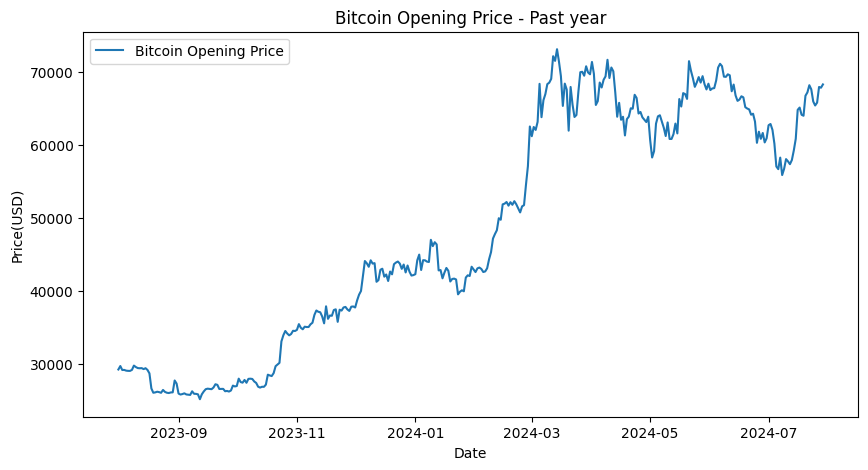

In [21]:
#Looks like there is no extreme value
# Lets continue with some plots of the data to better understand them
# First lets plot the opening price for the past year
plt.figure(figsize=(10,5))
plt.plot(btc_data['Open'], label='Bitcoin Opening Price')
plt.title('Bitcoin Opening Price - Past year')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
plt.show()

In [22]:
#Lets calculate the moving average for 20 day and 50-day
btc_data['20d'] = btc_data['Open'].rolling(window=20).mean()
btc_data['50d'] = btc_data['Open'].rolling(window=50).mean()

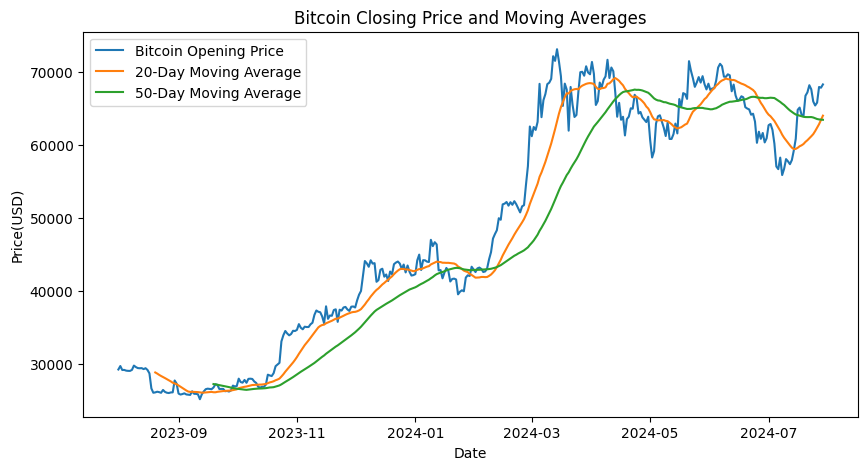

In [23]:
#Lets plot the opening prices along with the moving averages
plt.figure(figsize=(10, 5))
plt.plot(btc_data['Open'], label='Bitcoin Opening Price')
plt.plot(btc_data['20d'], label='20-Day Moving Average')
plt.plot(btc_data['50d'], label='50-Day Moving Average')
plt.title('Bitcoin Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
# Preparing a Machine learning model
btc_data['Date'] = btc_data.index
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data.set_index('Date', inplace=True)


btc_ml = btc_data[['Open']].copy()

btc_ml['Prev Open'] = btc_ml['Open'].shift(1)
btc_ml.dropna(inplace=True)

In [30]:
#Split the data
X = btc_ml[['Prev Open']].values
y = btc_ml['Open'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [31]:
# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Train the machine learning model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Forecast future prices
y_pred = model.predict(X_test_scaled)

In [42]:
# Calculate MSE, RMSE, and MAE to evaluate our model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 1914102.6344522038
Root Mean Squared Error: 1383.5109809655303
Mean Absolute Error: 1032.9407810885284


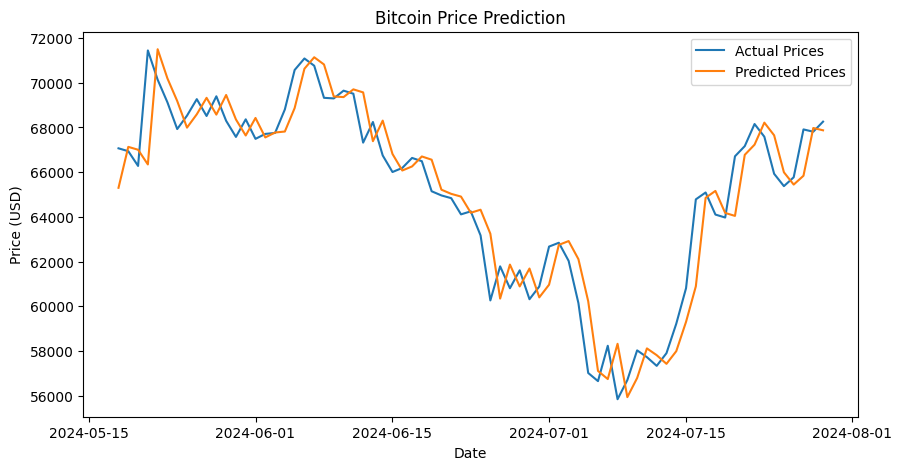

In [36]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(btc_ml.index[len(X_train):len(X_train) + len(y_test)], y_test, label='Actual Prices')
plt.plot(btc_ml.index[len(X_train):len(X_train) + len(y_pred)], y_pred, label='Predicted Prices')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Mean Squared Error: 2,755,394.35
Root Mean Squared Error: 1,659.94
Mean Absolute Error: 1,316.50


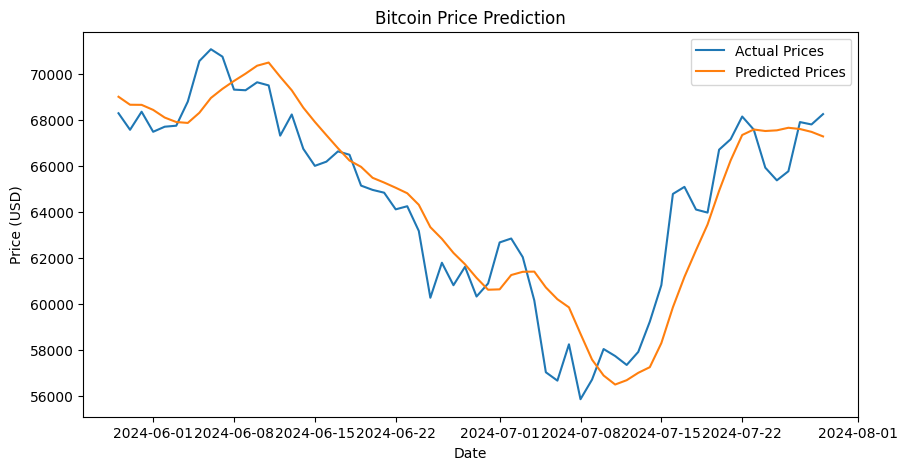

In [70]:
#Lets use a different approach. We will calculate the moving average for 7,14 and 30 days
# Create moving average features
btc_ml['MA7'] = btc_ml['Open'].rolling(window=7).mean()
btc_ml['MA14'] = btc_ml['Open'].rolling(window=14).mean()
btc_ml['MA30'] = btc_ml['Open'].rolling(window=30).mean()
btc_ml.dropna(inplace=True)

# Split the data into training and test sets
X = btc_ml[['MA7', 'MA14', 'MA30']].values
y = btc_ml['Open'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the machine learning model (Linear Regression for simplicity)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Forecast future prices
y_pred = model.predict(X_test_scaled)

# Calculate MSE, RMSE, and MAE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:,.2f}')
print(f'Root Mean Squared Error: {rmse:,.2f}')
print(f'Mean Absolute Error: {mae:,.2f}')

# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(btc_ml.index[len(X_train):len(X_train) + len(y_test)], y_test, label='Actual Prices')
plt.plot(btc_ml.index[len(X_train):len(X_train) + len(y_pred)], y_pred, label='Predicted Prices')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [57]:
# Lets use Fibonacci function to predict future prices.
# Define function to calculate Fibonacci levels for a given data slice
def moving_fibonacci_retracement(data, window):
    fib_levels = pd.DataFrame(index=data.index)
    for i in range(window - 1, len(data)):
        subset = data.iloc[i - window + 1:i + 1]
        max_price = subset['Open'].max()
        min_price = subset['Open'].min()
        diff = max_price - min_price

        level1 = max_price - 0.236 * diff
        level2 = max_price - 0.382 * diff
        level3 = max_price - 0.618 * diff

        fib_levels.loc[data.index[i], 'Fib_Level1'] = level1
        fib_levels.loc[data.index[i], 'Fib_Level2'] = level2
        fib_levels.loc[data.index[i], 'Fib_Level3'] = level3

    fib_levels.bfill(inplace=True)
    return fib_levels

In [82]:
# Calculate moving Fibonacci retracement levels
window_size = 5
fib_levels = moving_fibonacci_retracement(btc_ml, window_size)

In [83]:
# Merge Fibonacci levels with the main dataframe
btc_ml = pd.concat([btc_ml, fib_levels], axis=1)
btc_ml.dropna(inplace=True)

In [84]:
# Prepare features and target variable
features = ['Fib_Level1', 'Fib_Level2', 'Fib_Level3']
X = btc_ml[features].values
y = btc_ml['Open'].values

In [85]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the machine learning model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Forecast future prices
y_pred = model.predict(X_test_scaled)

In [86]:
#Evaluate the model
# Calculate MSE, RMSE, and MAE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:,.2f}')
print(f'Root Mean Squared Error: {rmse:,.2f}')
print(f'Mean Absolute Error: {mae:,.2f}')

Mean Squared Error: 1,908,098.38
Root Mean Squared Error: 1,381.34
Mean Absolute Error: 1,086.75


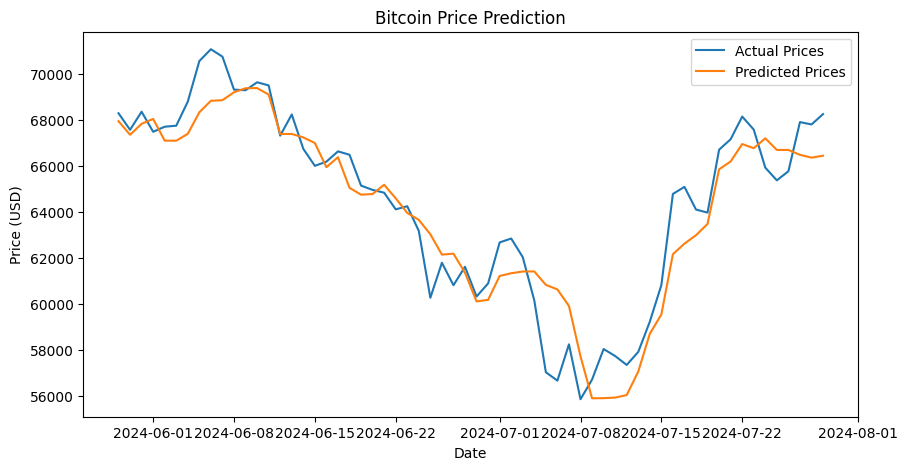

In [87]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(btc_ml.index[len(X_train):len(X_train) + len(y_test)], y_test, label='Actual Prices')
plt.plot(btc_ml.index[len(X_train):len(X_train) + len(y_pred)], y_pred, label='Predicted Prices')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()